In [ ]:
import pandas as pd
data = pd.read_csv('/content/dataset_med.csv')
#DATA_CLEANING
# Remove missing values from the original dataframe
data.dropna(inplace=True)

# Remove duplicates from the original dataframe
data.drop_duplicates(inplace=True)

# Save the cleaned dataframe to a new CSV file
data.to_csv("cleaned_actual_test.csv", index=False)
print(data)

print("Cleaned dataset has been saved to 'cleaned_test.csv'")


            id   age  gender      country diagnosis_date cancer_stage  \
0            1  64.0    Male       Sweden     2016-04-05      Stage I   
1            2  50.0  Female  Netherlands     2023-04-20    Stage III   
2            3  65.0  Female      Hungary     2023-04-05    Stage III   
3            4  51.0  Female      Belgium     2016-02-05      Stage I   
4            5  37.0    Male   Luxembourg     2023-11-29      Stage I   
...        ...   ...     ...          ...            ...          ...   
889995  889996  40.0    Male        Malta     2022-07-01     Stage IV   
889996  889997  62.0  Female       Cyprus     2015-09-27     Stage II   
889997  889998  48.0  Female      Estonia     2016-03-27    Stage III   
889998  889999  67.0  Female     Slovakia     2015-12-22     Stage IV   
889999  890000  55.0  Female        Malta     2021-07-26     Stage II   

       family_history  smoking_status   bmi  cholesterol_level  hypertension  \
0                 Yes  Passive Smoker  29.4

                         id       age       bmi  cholesterol_level  \
id                 1.000000  0.000142 -0.001144          -0.001507   
age                0.000142  1.000000  0.000915           0.001799   
bmi               -0.001144  0.000915  1.000000           0.746905   
cholesterol_level -0.001507  0.001799  0.746905           1.000000   
hypertension      -0.002296 -0.001082  0.001923           0.002049   
asthma             0.000096 -0.000519  0.001662           0.001263   
cirrhosis          0.001167 -0.000067  0.000608           0.000467   
other_cancer      -0.000872 -0.000785  0.000771          -0.000185   
survived           0.000517  0.001233  0.000007           0.000157   

                   hypertension    asthma  cirrhosis  other_cancer  survived  
id                    -0.002296  0.000096   0.001167     -0.000872  0.000517  
age                   -0.001082 -0.000519  -0.000067     -0.000785  0.001233  
bmi                    0.001923  0.001662   0.000608      0.00

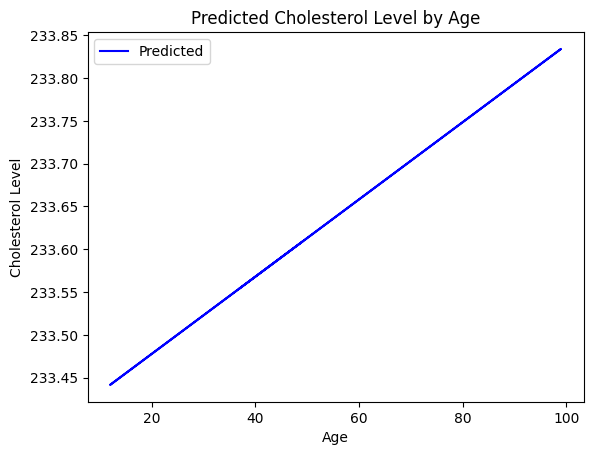

In [ ]:
#Linear Regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('/content/cleaned_actual_test.csv')

# Define features and target
X = data[['age']]
y = data['cholesterol_level']

print(data.corr(numeric_only=True))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy using R² Score
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {accuracy:.2f}")

# Line plot (Predicted vs Age)
plt.plot(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Predicted Cholesterol Level by Age')
plt.legend()
plt.show()

Model Accuracy (R² Score): -0.00


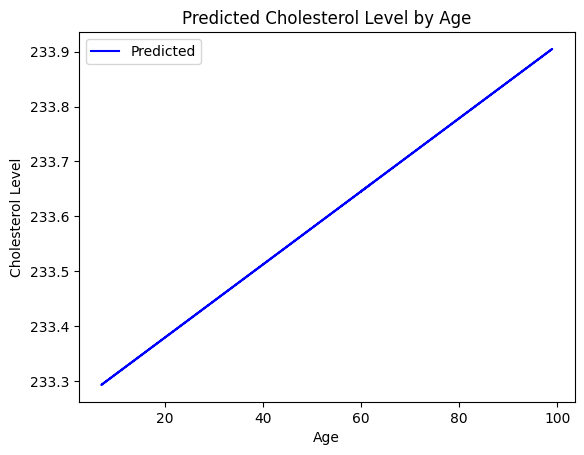

In [ ]:
#Linear Regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('/content/cleaned_test.csv')

# Define features and target
X = data[['age']]
y = data['cholesterol_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy using R² Score
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {accuracy:.2f}")

# Line plot (Predicted vs Age)
plt.plot(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Predicted Cholesterol Level by Age')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
data = pd.read_csv('/content/cleaned_actual_test.csv')

# 1. Drop missing values
data.dropna(inplace=True)

# 2. Drop duplicate rows
data.drop_duplicates(inplace=True)

# 3. Encode categorical columns (Label Encoding)
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 4. Scale numerical features
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# 5. Display the cleaned and preprocessed data
print("Cleaned and Preprocessed Data:")
print(data.head())

# 6. Save to new CSV
data.to_csv("cleaned_actual_test.csv", index=False)
print("Cleaned dataset has been saved to 'cleaned_actual_test.csv'")


FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_actual_test.csv'

Model Accuracy (R² Score): 0.56


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


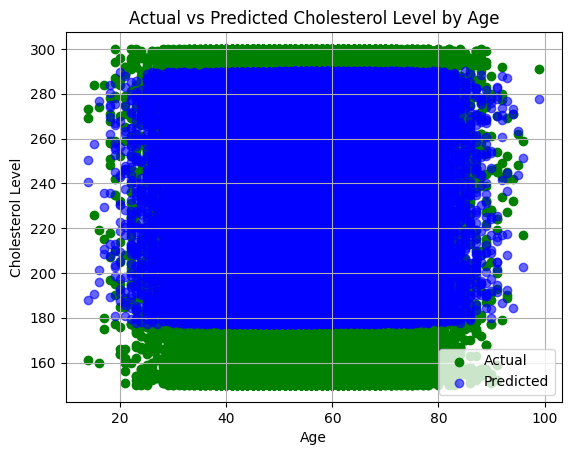

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('/content/dataset_med.csv')

# Define features and target
X = data[['age','bmi','asthma','hypertension']]
y = data['cholesterol_level']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy using R² Score
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {accuracy:.2f}")

#  Scatter plot: Age vs Cholesterol (actual and predicted)
plt.scatter(X_test['age'], y_test, color='green', label='Actual')
plt.scatter(X_test['age'], y_pred, color='blue', alpha=0.6, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Actual vs Predicted Cholesterol Level by Age')
plt.legend()
plt.grid(True)
plt.show()

Model Accuracy: 0.76


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


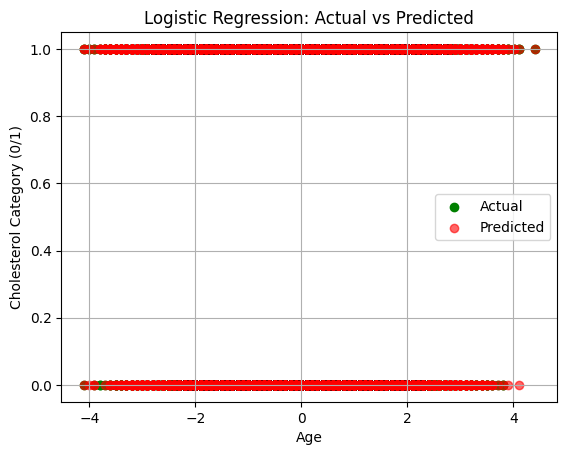

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/dataset_med.csv')

# Make target binary
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['cholesterol_level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression with safe settings
model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Scatter plot
plt.scatter(X_test[:, 0], y_test, color='green', label='Actual')   # age is X[:, 0]
plt.scatter(X_test[:, 0], y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Cholesterol Category (0/1)')
plt.title('Logistic Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

KNN Model Accuracy: 0.76


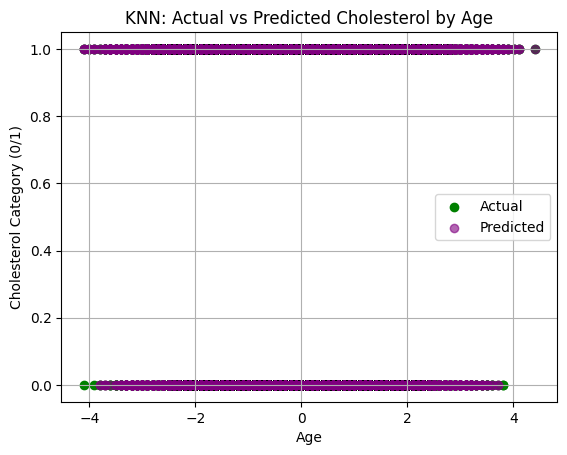

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/dataset_med.csv')

# Convert cholesterol level to binary (0: normal, 1: high)
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['cholesterol_level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

# Scatter plot: Age vs Cholesterol (Actual vs Predicted)
plt.scatter(X_test[:, 0], y_test, color='green', label='Actual')   # Age
plt.scatter(X_test[:, 0], y_pred, color='purple', alpha=0.6, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Cholesterol Category (0/1)')
plt.title('KNN: Actual vs Predicted Cholesterol by Age')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv('/content/dataset_med.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace = True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[data.select_dtypes(include='number').columns] = scaler.fit_transform(data.select_dtypes(include='number'))

data.to_csv("cleaned_test.csv", index=False)

print("Cleaned dataset has been saved to 'cleaned_disease_test.csv'")

Cleaned dataset has been saved to 'cleaned_disease_test.csv'


KNN Model Accuracy: 1.00


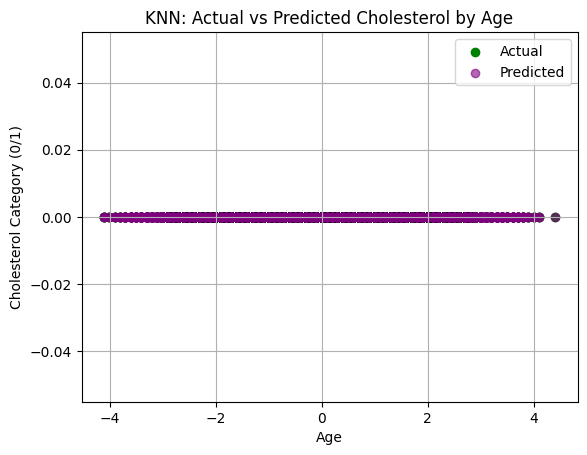

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/cleaned_test.csv')

# Convert cholesterol level to binary (0: normal, 1: high)
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['cholesterol_level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")

# Scatter plot: Age vs Cholesterol (Actual vs Predicted)
plt.scatter(X_test[:, 0], y_test, color='green', label='Actual')   # Age
plt.scatter(X_test[:, 0], y_pred, color='purple', alpha=0.6, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Cholesterol Category (0/1)')
plt.title('KNN: Actual vs Predicted Cholesterol by Age')
plt.legend()
plt.grid(True)
plt.show()

KNN Model Accuracy: 1.00

Enter the following details to predict cholesterol level category:
Age: 18
BMI: 45
Asthma (0 = No, 1 = Yes): 0
Hypertension (0 = No, 1 = Yes): 0

Predicted Cholesterol Level Category: Normal Cholesterol


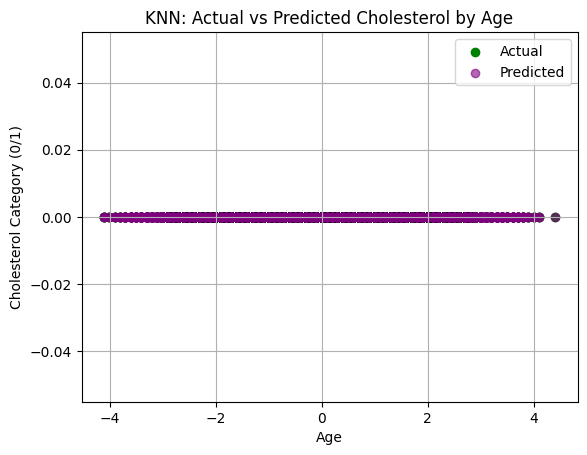

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/cleaned_test.csv')

# Convert cholesterol level to binary (0: normal, 1: high)
data['cholesterol_level'] = (data['cholesterol_level'] >= 200).astype(int)

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['cholesterol_level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy:.2f}")


# Collect input from user
print("\nEnter the following details to predict cholesterol level category:")
age = float(input("Age: "))
bmi = float(input("BMI: "))
asthma = int(input("Asthma (0 = No, 1 = Yes): "))
hypertension = int(input("Hypertension (0 = No, 1 = Yes): "))

# Prepare input and scale it
user_data = pd.DataFrame([[age, bmi, asthma, hypertension]], columns=['age', 'bmi', 'asthma', 'hypertension'])
user_scaled = scaler.transform(user_data)

# Make prediction
user_prediction = knn.predict(user_scaled)

# Show result
result = "High Cholesterol" if user_prediction[0] == 1 else "Normal Cholesterol"
print(f"\nPredicted Cholesterol Level Category: {result}")

# Scatter plot: Age vs Cholesterol (Actual vs Predicted)
plt.scatter(X_test[:, 0], y_test, color='green', label='Actual')   # Age
plt.scatter(X_test[:, 0], y_pred, color='purple', alpha=0.6, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Cholesterol Category (0/1)')
plt.title('KNN: Actual vs Predicted Cholesterol by Age')
plt.legend()
plt.grid(True)
plt.show()

Logistic Regression Accuracy (Survival): 0.78

Enter the following details to predict survival:
Age: 18
BMI: 56
Asthma (0 = No, 1 = Yes): 1
Hypertension (0 = No, 1 = Yes): 0

Predicted Survival Outcome: Did Not Survive


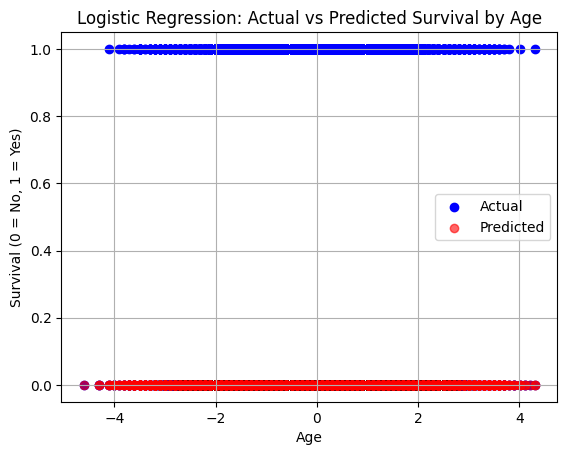

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('/content/cleaned_test.csv')

# Features and target
X = data[['age', 'bmi', 'asthma', 'hypertension']]
y = data['survived']  # Predicting survival

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data with stratify to ensure both survival classes are represented
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy (Survival): {accuracy:.2f}")

# --- USER INPUT SECTION ---
print("\nEnter the following details to predict survival:")

try:
    age = float(input("Age: "))
    bmi = float(input("BMI: "))
    asthma = int(input("Asthma (0 = No, 1 = Yes): "))
    hypertension = int(input("Hypertension (0 = No, 1 = Yes): "))

    # Prepare and scale input
    user_data = pd.DataFrame([[age, bmi, asthma, hypertension]], columns=['age', 'bmi', 'asthma', 'hypertension'])
    user_scaled = scaler.transform(user_data)

    # Predict
    user_prediction = logreg.predict(user_scaled)
    result = "Survived" if user_prediction[0] == 1 else "Did Not Survive"
    print(f"\nPredicted Survival Outcome: {result}")

except Exception as e:
    print(f"Invalid input. Error: {e}")

# --- Visualization ---
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')   # Age vs Survival
plt.scatter(X_test[:, 0], y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Age')
plt.ylabel('Survival (0 = No, 1 = Yes)')
plt.title('Logistic Regression: Actual vs Predicted Survival by Age')
plt.legend()
plt.grid(True)
plt.show()



Linear Regression MSE: 0.04
Linear Regression R² Score: 0.56

Enter the following details to predict cholesterol level:
Age: 20
BMI: 45
Asthma (0 = No, 1 = Yes): 0
Hypertension (0 = No, 1 = Yes): 0

Predicted Cholesterol Level: 34.00


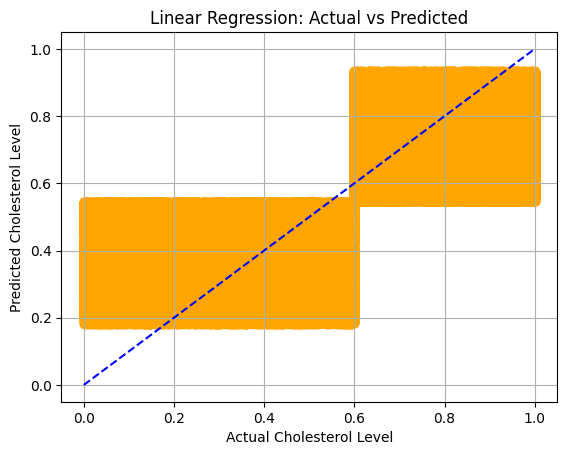

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/content/cleaned_test.csv')

# Target should be continuous
y = data['']  # Continuous target for linear regression
X = data[['']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict
y_pred = linreg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

# --- USER INPUT SECTION ---
print("\nEnter the following details to predict cholesterol level:")
try:
    age = float(input("Age: "))
    bmi = float(input("BMI: "))
    asthma = int(input("Asthma (0 = No, 1 = Yes): "))
    hypertension = int(input("Hypertension (0 = No, 1 = Yes): "))

    # Prepare and scale input
    user_data = pd.DataFrame([[age, bmi, asthma, hypertension]], columns=['age', 'bmi', 'asthma', 'hypertension'])
    user_scaled = scaler.transform(user_data)

    # Predict cholesterol level
    user_prediction = linreg.predict(user_scaled)
    print(f"\nPredicted Cholesterol Level: {user_prediction[0]:.2f}")

except Exception as e:
    print(f"Invalid input! Error: {e}")

# --- Plot: Actual vs Predicted ---
plt.scatter(y_test, y_pred, color='orange')
plt.xlabel("Actual Cholesterol Level")
plt.ylabel("Predicted Cholesterol Level")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b--')  # Reference line
plt.show()
